In [1]:
%run ./read_file.ipynb

:: loading settings :: url = jar:file:/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/ec2-user/.ivy2/cache
The jars for the packages stored in: /home/ec2-user/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7f68ac86-3109-412b-b17c-6969ae90ff39;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
downloading https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar ...
	[SUCCESSFUL ] graphframes#graphframes;0.8.2-spark3.2-s_2.12!graphframes.jar (45ms)
downloading https://repo1.maven.org/maven2/org/slf4j/slf4j-api/1.7.16/slf4j-api-1.7.16.jar ...
	[SUCCESSFUL ] org.slf4j#slf4j-api;1.7.16!slf4j-api.jar (24ms)
:: resolution report :: resolve 623ms :: artifacts dl 73ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	--------

23/03/30 22:02:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/30 22:02:26 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [2]:
from graphframes import GraphFrame

In [3]:
df = readFirstEvents().cache()

10:02PM UTC on Mar 30, 2023 --- read time: 6.810409069061279 seconds ---


In [4]:
df.groupBy('malicious').count().show()

+---------+-------+
|malicious|  count|
+---------+-------+
|        1|   8596|
|        0|4587096|
+---------+-------+



In [5]:
df.limit(2).toPandas()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,id,timestamp,objectID,actorID,object,action,hostname,user_name,privileges,image_path,...,file_path,direction,logon_id,requesting_domain,requesting_user,event_minute,event_day,event_hour,malicious,relationship
0,a6d975ba-5668-461b-bf1d-9eb73e4b9aec,2019-09-23 19:07:50.151,8b0a8788-d3bf-4a28-bfec-263be98860b3,0017062c-d130-46d7-816b-097845177ee4,FILE,READ,SysClient0351.systemia.com,None,None,\Device\HarddiskVolume1\Program Files\WindowsA...,...,\Device\HarddiskVolume1\Users\bbateman\AppData...,None,None,None,None,7,23,19,0,0017062c-d130-46d7-816b-097845177ee4->8b0a8788...
1,42245fb4-1650-4671-a59f-4911ab5de377,2019-09-23 19:07:50.151,8b0a8788-d3bf-4a28-bfec-263be98860b3,0017062c-d130-46d7-816b-097845177ee4,FILE,MODIFY,SysClient0351.systemia.com,None,None,\Device\HarddiskVolume1\Program Files\WindowsA...,...,\Device\HarddiskVolume1\Users\bbateman\AppData...,None,None,None,None,7,23,19,0,0017062c-d130-46d7-816b-097845177ee4->8b0a8788...


In [6]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- objectID: string (nullable = true)
 |-- actorID: string (nullable = true)
 |-- object: string (nullable = true)
 |-- action: string (nullable = true)
 |-- hostname: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- privileges: string (nullable = true)
 |-- image_path: string (nullable = true)
 |-- parent_image_path: string (nullable = true)
 |-- new_path: string (nullable = true)
 |-- file_path: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- logon_id: string (nullable = true)
 |-- requesting_domain: string (nullable = true)
 |-- requesting_user: string (nullable = true)
 |-- event_minute: integer (nullable = true)
 |-- event_day: integer (nullable = true)
 |-- event_hour: integer (nullable = true)
 |-- malicious: integer (nullable = true)
 |-- relationship: string (nullable = true)



In [6]:
#how big is this dataset with just first events? And how does the relationship work? 
df.count()

4595692

In [7]:
#What days are represented? 
df.select('event_day').distinct().orderBy('event_day').show()

+---------+
|event_day|
+---------+
|       23|
|       24|
|       25|
+---------+



In [8]:
#how many hours? 
df.select('event_hour').distinct().orderBy('event_hour').show(25)
#I see all hours which means we likely filtered on 23 before we enmbarked on this journey. I think this might mean
#we have all the events. Exciting. 

+----------+
|event_hour|
+----------+
|         0|
|         1|
|         2|
|         3|
|         4|
|         5|
|         6|
|         7|
|         8|
|         9|
|        10|
|        11|
|        12|
|        13|
|        14|
|        15|
|        16|
|        17|
|        18|
|        19|
|        20|
|        21|
|        22|
|        23|
+----------+



In [9]:
df_benign = df.where(col('malicious') == 0)
df_benign.count()

4587096

In [10]:
df_benign_lim = df_benign.limit(500000)

In [11]:
df_mal = df.where(col('malicious') == 1)
df_mal.count()
#I'm not thrilled that the malicious count isn't even close to what was shown in the paper

8596

In [12]:
print("image paths: " + str(df.select("image_path").distinct().count()))
print("parent paths: " + str(df.select("parent_image_path").distinct().count()))

image paths: 252
parent paths: 226


In [13]:
# df = df.limit(1000).cache()

In [14]:
df.count()

4595692

In [15]:
# Create distinct vertices with source as actorid, destination as objectid
src_vertices = df_benign_lim.selectExpr('actorID as id').distinct()
dst_vertices = df_benign_lim.selectExpr('objectID as id').distinct()
vertices = src_vertices.union(dst_vertices).distinct()

# Create edges by using timestamp as an edge
edges = df_benign_lim.selectExpr('actorID as src', 'objectID as dst', 'timestamp', 'object', 'action', 'hostname', 'user_name', 'privileges', 'image_path',
                      'parent_image_path', 'new_path', 'file_path', 'direction', 'logon_id', 'requesting_domain', 'requesting_user', 'malicious')

# Create GraphFrame
g = GraphFrame(vertices, edges)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [16]:
# Create distinct vertices with source as actorid, destination as objectid for malicious
src_vertices = df_mal.selectExpr('actorID as id').distinct()
dst_vertices = df_mal.selectExpr('objectID as id').distinct()
vertices = src_vertices.union(dst_vertices).distinct()

# Create edges by using timestamp as an edge
edges = df_mal.selectExpr('actorID as src', 'objectID as dst', 'timestamp', 'object', 'action', 'hostname', 'user_name', 'privileges', 'image_path',
                      'parent_image_path', 'new_path', 'file_path', 'direction', 'logon_id', 'requesting_domain', 'requesting_user', 'malicious')

# Create GraphFrame
g = GraphFrame(vertices, edges)

In [17]:
# display the vertices
print("Vertices:")
g.vertices.limit(2).toPandas()

Vertices:


,id
0,b9955edc-eccc-4948-8c2f-4cc6608c1e27
1,d5846376-9596-4283-8505-8e6112abf1f2


In [18]:
# display the edges
print("Edges:")
g.edges.limit(2).toPandas()

Edges:


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,src,dst,timestamp,object,action,hostname,user_name,privileges,image_path,parent_image_path,new_path,file_path,direction,logon_id,requesting_domain,requesting_user,malicious
0,054df7d9-801e-49d0-b8cd-4f20b42a4305,a829facc-8645-4084-a606-e66f8f07c58c,2019-09-24 15:09:59.426,SHELL,COMMAND,SysClient0501.systemia.com,None,None,\Device\HarddiskVolume1\Windows\System32\Windo...,None,None,None,None,None,None,None,1
1,266392d7-012e-479b-a43a-fd5190bf22ac,d831de20-4434-4791-8d07-aa27286766c7,2019-09-24 19:41:17.964,FILE,READ,SysClient0851.systemia.com,None,None,powershell.exe,None,None,\Device\HarddiskVolume1\Windows\Prefetch\POWER...,None,None,None,None,1


In [19]:
g.inDegrees.limit(2).toPandas()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


,id,inDegree
0,3b37b7f2-8d76-484c-9b27-e9c9808ccb0f,1
1,5d2847ec-878c-4e52-93b3-61427344e69c,1


In [20]:
# find all paths of length 6 in the graph
# Handling null values in shorter length 
motifs2 = g.find("(a)-[e1]->(b); (b)-[e2]->(c)")
#motifs6 = g.find("(a)-[e1]->(b); (b)-[e2]->(c); (c)-[e3]->(d)")
motifs6 = g.find("(a)-[e1]->(b); (b)-[e2]->(c); (c)-[e3]->(d); (d)-[e4]->(e); (e)-[e5]->(f); (f)-[e6]->(g)")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


## PageRank

PageRank is an algorithm to measure the importance of web pages based on the structure of the web. 

The core idea behind PageRank is that a link from one page to another can be considered as a "vote" for the destination page. A page with more votes (incoming links) is considered more important. However, not all votes are equal – a vote from a more important page carries more weight than a vote from a less important page.

Parameters:  resetProbability determines the probability of a random web surfer continuing to click on links, while maxIter sets the maximum number of iterations for the PageRank algorithm to converge.

#### PageRank on Graph Nodes

In [7]:
pagerank = g.pageRank(resetProbability=0.15, maxIter=10)


NameError: name 'g' is not defined

In [ ]:
from pyspark.sql import functions as F

sorted_pagerank_vertices = pagerank_vertices.orderBy(F.desc("pagerank"))
sorted_pagerank_vertices.show()


#### PageRank on Motifs

In [38]:
motifs = g.find("(a)-[e1]->(b); (b)-[e2]->(c)")

In [39]:
motif_vertices = (
    motifs.selectExpr("a.id as id")
    .union(motifs.selectExpr("b.id as id"))
    .union(motifs.selectExpr("c.id as id"))
    .distinct()
)
motif_edges = (
    motifs.selectExpr("e1.src as src", "e1.dst as dst")
    .union(motifs.selectExpr("e2.src as src", "e2.dst as dst"))
    .distinct()
)

In [40]:
motif_graph = GraphFrame(motif_vertices, motif_edges)
motif_pagerank = motif_graph.pageRank(resetProbability=0.15, maxIter=10)


In [42]:
motif_pagerank_vertices = motif_pagerank.vertices
motif_pagerank_vertices.show()


+--------------------+------------------+
|                  id|          pagerank|
+--------------------+------------------+
|b9955edc-eccc-494...|1.1587142223627234|
|1006f812-b221-46f...|0.9891875357789084|
|8916c2f9-2179-4e6...|1.0036714635584423|
|054df7d9-801e-49d...|0.9980742101958321|
|91cf6eed-6ee7-43a...|1.8323340295619621|
|443c9039-ae6b-41a...|0.9972158034342056|
|45b923f4-4f3a-4f0...| 1.001411402808524|
|a9fda05d-c2e2-466...|0.9891875357789084|
|03d91181-4d5e-473...|0.9891875357789084|
|e0375037-23c7-4b9...|0.9891875357789084|
|e68ba31f-8c2d-471...|0.9891875357789084|
|003b14a0-43d3-488...|1.8299969411909802|
|776b447e-7c07-44a...|0.9891875357789084|
|1415fe71-91a1-423...|0.9891875357789084|
|4b7c800a-1689-494...|0.9891875357789084|
|c290c75e-a7ce-48b...|1.0224316379438259|
|b2b03ca8-504e-48f...|1.4130353967922633|
|97cfe185-0a9c-48d...|0.9891875357789084|
|c239b575-3fc2-481...|0.9891875357789084|
|f5d1c003-1f65-4a8...|0.9916131586956938|
+--------------------+------------

In [43]:
motif_pagerank_vertices.toPandas().sort_values(by='pagerank', ascending=False)


,id,pagerank
35,3eea9071-9ceb-468a-ad89-9e3890833e52,1.833158
4,91cf6eed-6ee7-43aa-a2d0-62e81ca89e2e,1.832334
24,a52f6519-6265-4437-9f6c-3402fb245cc7,1.832059
31,5a60d1b7-1b06-4f19-b8df-fa8719a6d817,1.829997
51,70ba4f9c-e27b-4a34-8dce-303c00c227c2,1.829997
...,...,...
14,4b7c800a-1689-4941-adef-7365885e9859,0.989188
23,03b283ab-a1a0-42f2-9509-5c0cae5cadec,0.989188
42,8a6bcace-4bdc-4b4b-a544-7c4125181cf1,0.989188
25,22008aa6-3d47-43b2-9a1d-a7394dfc46c6,0.989188


In [44]:
motif_pagerank_vertices.toPandas().sort_values(by='pagerank', ascending=True)

,id,pagerank
23,03b283ab-a1a0-42f2-9509-5c0cae5cadec,0.989188
29,00fc2f36-4e80-441e-863f-2981650310d4,0.989188
28,7c2e762b-2b1c-48ca-ac35-b420fad104bf,0.989188
33,ceac4f73-2e78-425b-a119-e0caef83a15c,0.989188
26,ff233001-a7c6-438f-9e81-9a0a5a5fbb9b,0.989188
...,...,...
50,2d02ab42-4400-4049-baad-6dfae19c3c4c,1.829997
48,473d7954-6271-43b8-9984-702378220af2,1.829997
24,a52f6519-6265-4437-9f6c-3402fb245cc7,1.832059
4,91cf6eed-6ee7-43aa-a2d0-62e81ca89e2e,1.832334


#### PageRank on entire graph

In [8]:
# Create distinct vertices with source as actorid, destination as objectid for malicious
src_vertices = df.selectExpr('actorID as id').distinct()
dst_vertices = df.selectExpr('objectID as id').distinct()
vertices = src_vertices.union(dst_vertices).distinct()

# Create edges by using timestamp as an edge
edges = df.selectExpr('actorID as src', 'objectID as dst', 'timestamp', 'object', 'action', 'hostname', 'user_name', 'privileges', 'image_path',
                      'parent_image_path', 'new_path', 'file_path', 'direction', 'logon_id', 'requesting_domain', 'requesting_user', 'malicious')

# Create GraphFrame
g = GraphFrame(vertices, edges)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [9]:
pagerank = g.pageRank(resetProbability=0.15, maxIter=10)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [10]:
pagerank_vertices = pagerank.vertices
pagerank_vertices.show()

+--------------------+------------------+
|                  id|          pagerank|
+--------------------+------------------+
|000b6bbf-fddd-456...|0.7854181229490625|
|00337abe-e61a-457...|0.7888185397157303|
|009219d6-7a35-4b3...|0.7852968205119447|
|00a9cd41-86da-47e...| 0.879210792864403|
|00c9b78d-0976-407...|0.7863278023727065|
|00d3180f-06c7-4aa...|0.7851355192126952|
|0174d4d5-8c21-42f...|0.7853588175147581|
|01c8b545-a730-401...|0.7855657324093682|
|02261431-586c-4af...|0.7859869985533963|
|03449652-f5b6-40e...|0.8499556501632949|
|034a631a-d0f6-40e...|0.7914663631809927|
|03f4bd3c-71e1-4c7...|0.7857893282667743|
|04a95155-956e-431...|0.7858269640192371|
|04f70a16-3008-4e4...|0.7855729950912167|
|05a0ce8a-eff2-4a7...|0.7863529178971133|
|05afe004-e76a-45c...|0.7878043775510711|
|05b585f3-b8ec-4cf...|0.7878487180315622|
|06561b96-23fe-41f...|0.7863117655137813|
|06bf7bb8-532d-4c7...|0.7863328372834931|
|06dc22ec-20cb-406...|0.7863869556667812|
+--------------------+------------

In [11]:
pagerank_vertices.toPandas().sort_values(by='pagerank', ascending=False)

,id,pagerank
740158,df1e0448-d7e4-477d-8dbd-bb340d5a5316,760.874201
813105,96462285-60f5-4bf5-ba28-1fd441e7c5ae,513.036925
80932,52a9dec7-7fa4-4f54-8b6b-ed718737d8c2,504.581668
132270,79cb2b56-5926-4e3a-99d5-422200eeec75,503.292320
820967,2bb87777-9820-4c13-9cb9-b5f974b1a1b9,501.703641
...,...,...
190706,8a5822dc-f306-4620-b33f-6d293a4f32f7,0.785136
1266162,f79ab80f-51e7-4b6a-969d-2a9087069762,0.785136
190794,b8e2ac68-ae6a-484d-9578-39b9684d0b8f,0.785136
718084,54da1d84-ace4-4363-8725-b922c6102caa,0.785136


In [57]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col

# if timestamp_bins exists then drop the column
pagerank_vertices = pagerank_vertices.drop("bins")

# Calculate the bin size
bin_size = (max_score - min_score) / 10

# Create a Bucketizer to group the PageRank scores into 10 bins
bucketizer = Bucketizer(splits=[float('-inf')] + [min_score + i*bin_size for i in range(1,10)] + [float('inf')], inputCol="pagerank", outputCol="bins")

# Apply the Bucketizer to the DataFrame and add the new column
pagerank_vertices = bucketizer.transform(pagerank_vertices)
pagerank_vertices = pagerank_vertices.withColumn("bins", col("bins")+1)

# Show the results
pagerank_vertices.show()

+--------------------+------------------+----+
|                  id|          pagerank|bins|
+--------------------+------------------+----+
|000b6bbf-fddd-456...|0.7854181229490625| 1.0|
|00337abe-e61a-457...|0.7888185397157303| 1.0|
|009219d6-7a35-4b3...|0.7852968205119447| 1.0|
|00a9cd41-86da-47e...| 0.879210792864403| 1.0|
|00c9b78d-0976-407...|0.7863278023727065| 1.0|
|00d3180f-06c7-4aa...|0.7851355192126952| 1.0|
|0174d4d5-8c21-42f...|0.7853588175147581| 1.0|
|01c8b545-a730-401...|0.7855657324093682| 1.0|
|02261431-586c-4af...|0.7859869985533963| 1.0|
|03449652-f5b6-40e...|0.8499556501632949| 1.0|
|034a631a-d0f6-40e...|0.7914663631809927| 1.0|
|03f4bd3c-71e1-4c7...|0.7857893282667743| 1.0|
|04a95155-956e-431...|0.7858269640192371| 1.0|
|04f70a16-3008-4e4...|0.7855729950912167| 1.0|
|05a0ce8a-eff2-4a7...|0.7863529178971133| 1.0|
|05afe004-e76a-45c...|0.7878043775510711| 1.0|
|05b585f3-b8ec-4cf...|0.7878487180315622| 1.0|
|06561b96-23fe-41f...|0.7863117655137813| 1.0|
|06bf7bb8-532

In [58]:
pagerank_vertices.toPandas().sort_values(by='pagerank', ascending=False)

,id,pagerank,bins
740158,df1e0448-d7e4-477d-8dbd-bb340d5a5316,760.874201,10.0
813105,96462285-60f5-4bf5-ba28-1fd441e7c5ae,513.036925,7.0
80932,52a9dec7-7fa4-4f54-8b6b-ed718737d8c2,504.581668,7.0
132270,79cb2b56-5926-4e3a-99d5-422200eeec75,503.292320,7.0
820967,2bb87777-9820-4c13-9cb9-b5f974b1a1b9,501.703641,7.0
...,...,...,...
190706,8a5822dc-f306-4620-b33f-6d293a4f32f7,0.785136,1.0
1266162,f79ab80f-51e7-4b6a-969d-2a9087069762,0.785136,1.0
190794,b8e2ac68-ae6a-484d-9578-39b9684d0b8f,0.785136,1.0
718084,54da1d84-ace4-4363-8725-b922c6102caa,0.785136,1.0


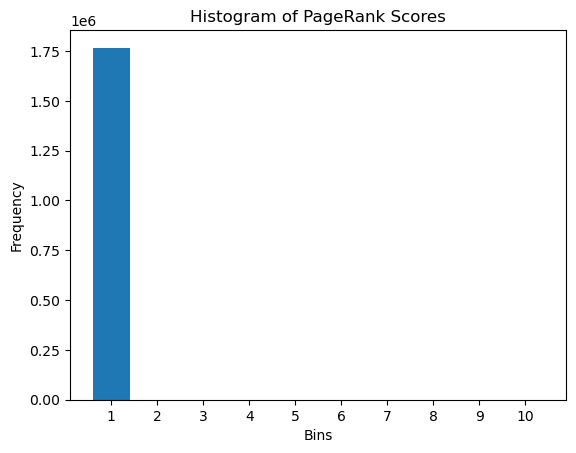

In [59]:
import matplotlib.pyplot as plt

# Group the DataFrame by the bins and count the number of rows in each group
hist_data = pagerank_vertices.groupBy("bins").count().orderBy("bins").collect()

# Extract the bin numbers and counts from the DataFrame
bins = [row["bins"] for row in hist_data]
counts = [row["count"] for row in hist_data]

# Create a bar plot of the histogram data
plt.bar(bins, counts, align='center')
plt.xticks(range(1, 11))
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of PageRank Scores')
plt.show()


In [60]:
from pyspark.sql.functions import count

# Group the DataFrame by the bins and count the number of rows in each group
bin_counts = pagerank_vertices.groupBy("bins").agg(count("*").alias("count")).orderBy("bins")

# Show the results
bin_counts.show()


+----+-------+
|bins|  count|
+----+-------+
| 1.0|1766866|
| 2.0|     21|
| 3.0|      2|
| 5.0|      5|
| 6.0|     15|
| 7.0|     32|
|10.0|      1|
+----+-------+



#### Quartiles

In [15]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
import numpy as np


pagerank_values = pagerank.vertices.select("pagerank").rdd.flatMap(lambda x: x).collect()

sorted_pagerank_values = sorted(pagerank_values)

Q1 = np.percentile(sorted_pagerank_values, 25)
Q2 = np.percentile(sorted_pagerank_values, 50)
Q3 = np.percentile(sorted_pagerank_values, 75)

def assign_quartile(score):
    if score <= Q1:
        return 'Q1'
    elif score <= Q2:
        return 'Q2'
    elif score <= Q3:
        return 'Q3'
    else:
        return 'Q4'

quartile_udf = udf(assign_quartile, StringType())

pagerank_with_quartiles = pagerank.vertices.withColumn("quartile", quartile_udf(col("pagerank")))



In [16]:
pagerank_with_quartiles.toPandas()

,id,pagerank,quartile
0,000b6bbf-fddd-456d-806b-a47919bcab24,0.785418,Q1
1,00337abe-e61a-4570-bf01-3584647a760a,0.788819,Q3
2,009219d6-7a35-4b3a-9561-f8624d9c6d0c,0.785297,Q1
3,00a9cd41-86da-47ec-9c3d-3e4c7721ff0f,0.879211,Q4
4,00c9b78d-0976-407d-ad6b-af7b14492485,0.786328,Q2
...,...,...,...
1766937,faa53506-4f36-4fb0-85a0-c65077de2e23,13.581664,Q4
1766938,faaa4bee-28d4-45ad-8e9f-daff5ed02e4d,0.786916,Q3
1766939,fc1f2163-5b38-423b-8c24-a53d5f35451f,0.785492,Q1
1766940,ff145f92-ede1-4332-aee0-ec89b6bf9c40,0.787091,Q3


In [19]:
from pyspark.sql.functions import count
quartile_counts = pagerank_with_quartiles.groupBy("quartile").agg(count("*").alias("count"))
quartile_counts.sort("quartile").show()



+--------+------+
|quartile| count|
+--------+------+
|      Q1|441944|
|      Q2|441824|
|      Q3|441443|
|      Q4|441731|
+--------+------+

